# Alternative Project: Read Chess Tournament Cross Table

# Alternative Project: Read Chess Tournament Cross Table

In [ ]:
import pandas as pd
import re
import sys
import numpy as np

# Reading the text file into the Ipython Notebook

In [ ]:
textfile = open('tournamentinfo.txt')

First i want to seperate the lines so i will strip them, and store them in a list using a list comprehension.

In [ ]:
text_table = [line.strip() for line in textfile.readlines()]

Print out the list, to inspect how it's formated and changes that will need to be made. (Cleaning)

In [ ]:
text_table

['-----------------------------------------------------------------------------------------',
 'Pair | Player Name                     |Total|Round|Round|Round|Round|Round|Round|Round|',
 'Num  | USCF ID / Rtg (Pre->Post)       | Pts |  1  |  2  |  3  |  4  |  5  |  6  |  7  |',
 '-----------------------------------------------------------------------------------------',
 '1 | GARY HUA                        |6.0  |W  39|W  21|W  18|W  14|W   7|D  12|D   4|',
 'ON | 15445895 / R: 1794   ->1817     |N:2  |W    |B    |W    |B    |W    |B    |W    |',
 '-----------------------------------------------------------------------------------------',
 '2 | DAKSHESH DARURI                 |6.0  |W  63|W  58|L   4|W  17|W  16|W  20|W   7|',
 'MI | 14598900 / R: 1553   ->1663     |N:2  |B    |W    |B    |W    |B    |W    |B    |',
 '-----------------------------------------------------------------------------------------',
 '3 | ADITYA BAJAJ                    |6.0  |L   8|W  61|W  25|W  21|W  11|W  13|W  12|',
 'MI | 14959604 / R: 1384   ->1640     |N:2  |W    |B    |W    |B    |W    |B    |W    |',
 '-----------------------------------------------------------------------------------------',
 '4 | PATRICK H SCHILLING             |5.5  |W  23|D  28|W   2|W  26|D   5|W  19|D   1|',
 'MI | 12616049 / R: 1716   ->1744     |N:2  |W    |B    |W    |B    |W    |B    |B    |',
 '-----------------------------------------------------------------------------------------',
 '5 | HANSHI ZUO                      |5.5  |W  45|W  37|D  12|D  13|D   4|W  14|W  17|',
 'MI | 14601533 / R: 1655   ->1690     |N:2  |B    |W    |B    |W    |B    |W    |B    |',
 '-----------------------------------------------------------------------------------------',
 '6 | HANSEN SONG                     |5.0  |W  34|D  29|L  11|W  35|D  10|W  27|W  21|',
 'OH | 15055204 / R: 1686   ->1687     |N:3  |W    |B    |W    |B    |B    |W    |B    |',
 '-----------------------------------------------------------------------------------------',
 '7 | GARY DEE SWATHELL               |5.0  |W  57|W  46|W  13|W  11|L   1|W   9|L   2|',
 'MI | 11146376 / R: 1649   ->1673     |N:3  |W    |B    |W    |B    |B    |W    |W    |',
 '-----------------------------------------------------------------------------------------',
 '8 | EZEKIEL HOUGHTON                |5.0  |W   3|W  32|L  14|L   9|W  47|W  28|W  19|',
 'MI | 15142253 / R: 1641P17->1657P24  |N:3  |B    |W    |B    |W    |B    |W    |W    |',
 '-----------------------------------------------------------------------------------------',
 '9 | STEFANO LEE                     |5.0  |W  25|L  18|W  59|W   8|W  26|L   7|W  20|',
 'ON | 14954524 / R: 1411   ->1564     |N:2  |W    |B    |W    |B    |W    |B    |B    |',
 '-----------------------------------------------------------------------------------------',
 '10 | ANVIT RAO                       |5.0  |D  16|L  19|W  55|W  31|D   6|W  25|W  18|',
 'MI | 14150362 / R: 1365   ->1544     |N:3  |W    |W    |B    |B    |W    |B    |W    |',
 '-----------------------------------------------------------------------------------------',
 '11 | CAMERON WILLIAM MC LEMAN        |4.5  |D  38|W  56|W   6|L   7|L   3|W  34|W  26|',
 'MI | 12581589 / R: 1712   ->1696     |N:3  |B    |W    |B    |W    |B    |W    |B    |',
 '-----------------------------------------------------------------------------------------',
 '12 | KENNETH J TACK                  |4.5  |W  42|W  33|D   5|W  38|H    |D   1|L   3|',
 'MI | 12681257 / R: 1663   ->1670     |N:3  |W    |B    |W    |B    |     |W    |B    |',
 '-----------------------------------------------------------------------------------------',
 '13 | TORRANCE HENRY JR               |4.5  |W  36|W  27|L   7|D   5|W  33|L   3|W  32|',
 'MI | 15082995 / R: 1666   ->1662     |N:3  |B    |W    |B    |B    |W    |W    |B    |',
 '-----------------------------------------------------------------------------------------',
 '14 | BRADLEY SHAW                    |4.5  |W  54|W  44|W   8|L   1|D  27|L   5|W  31|',
 'MI | 10131499 / R: 1610   ->1618     |N:3  |W    |B    |W    |W    |B    |B    |W    |',
 '-----------------------------------------------------------------------------------------',
 '15 | ZACHARY JAMES HOUGHTON          |4.5  |D  19|L  16|W  30|L  22|W  54|W  33|W  38|',
 'MI | 15619130 / R: 1220P13->1416P20  |N:3  |B    |B    |W    |W    |B    |B    |W    |',
 '-----------------------------------------------------------------------------------------',
 '16 | MIKE NIKITIN                    |4.0  |D  10|W  15|H    |W  39|L   2|W  36|U    |',
 'MI | 10295068 / R: 1604   ->1613     |N:3  |B    |W    |     |B    |W    |B    |     |',
 '-----------------------------------------------------------------------------------------',
 '17 | RONALD GRZEGORCZYK              |4.0  |W  48|W  41|L  26|L   2|W  23|W  22|L   5|',
 'MI | 10297702 / R: 1629   ->1610     |N:3  |W    |B    |W    |B    |W    |B    |W    |',
 '-----------------------------------------------------------------------------------------',
 '18 | DAVID SUNDEEN                   |4.0  |W  47|W   9|L   1|W  32|L  19|W  38|L  10|',
 'MI | 11342094 / R: 1600   ->1600     |N:3  |B    |W    |B    |W    |B    |W    |B    |',
 '-----------------------------------------------------------------------------------------',
 '19 | DIPANKAR ROY                    |4.0  |D  15|W  10|W  52|D  28|W  18|L   4|L   8|',
 'MI | 14862333 / R: 1564   ->1570     |N:3  |W    |B    |W    |B    |W    |W    |B    |',
 '-----------------------------------------------------------------------------------------',
 '20 | JASON ZHENG                     |4.0  |L  40|W  49|W  23|W  41|W  28|L   2|L   9|',
 'MI | 14529060 / R: 1595   ->1569     |N:4  |W    |B    |W    |B    |W    |B    |W    |',
 '-----------------------------------------------------------------------------------------',
 '21 | DINH DANG BUI                   |4.0  |W  43|L   1|W  47|L   3|W  40|W  39|L   6|',
 'ON | 15495066 / R: 1563P22->1562     |N:3  |B    |W    |B    |W    |W    |B    |W    |',
 '-----------------------------------------------------------------------------------------',
 '22 | EUGENE L MCCLURE                |4.0  |W  64|D  52|L  28|W  15|H    |L  17|W  40|',
 'MI | 12405534 / R: 1555   ->1529     |N:4  |W    |B    |W    |B    |     |W    |B    |',
 '-----------------------------------------------------------------------------------------',
 '23 | ALAN BUI                        |4.0  |L   4|W  43|L  20|W  58|L  17|W  37|W  46|',
 'ON | 15030142 / R: 1363   ->1371     |     |B    |W    |B    |W    |B    |W    |B    |',
 '-----------------------------------------------------------------------------------------',
 '24 | MICHAEL R ALDRICH               |4.0  |L  28|L  47|W  43|L  25|W  60|W  44|W  39|',
 'MI | 13469010 / R: 1229   ->1300     |N:4  |B    |W    |B    |B    |W    |W    |B    |',
 '-----------------------------------------------------------------------------------------',
 '25 | LOREN SCHWIEBERT                |3.5  |L   9|W  53|L   3|W  24|D  34|L  10|W  47|',
 'MI | 12486656 / R: 1745   ->1681     |N:4  |B    |W    |B    |W    |B    |W    |B    |',
 '-----------------------------------------------------------------------------------------',
 '26 | MAX ZHU                         |3.5  |W  49|W  40|W  17|L   4|L   9|D  32|L  11|',
 'ON | 15131520 / R: 1579   ->1564     |N:4  |B    |W    |B    |W    |B    |W    |W    |',
 '-----------------------------------------------------------------------------------------',
 '27 | GAURAV GIDWANI                  |3.5  |W  51|L  13|W  46|W  37|D  14|L   6|U    |',
 'MI | 14476567 / R: 1552   ->1539     |N:4  |W    |B    |W    |B    |W    |B    |     |',
 '-----------------------------------------------------------------------------------------',
 '28 | SOFIA ADINA STANESCU-BELLU      |3.5  |W  24|D   4|W  22|D  19|L  20|L   8|D  36|',
 'MI | 14882954 / R: 1507   ->1513     |N:3  |W    |W    |B    |W    |B    |B    |W    |',
 '-----------------------------------------------------------------------------------------',
 '29 | CHIEDOZIE OKORIE                |3.5  |W  50|D   6|L  38|L  34|W  52|W  48|U    |',
 'MI | 15323285 / R: 1602P6 ->1508P12  |N:4  |B    |W    |B    |W    |W    |B    |     |',
 '-----------------------------------------------------------------------------------------',
 '30 | GEORGE AVERY JONES              |3.5  |L  52|D  64|L  15|W  55|L  31|W  61|W  50|',
 'ON | 12577178 / R: 1522   ->1444     |     |W    |B    |B    |W    |W    |B    |B    |',
 '-----------------------------------------------------------------------------------------',
 '31 | RISHI SHETTY                    |3.5  |L  58|D  55|W  64|L  10|W  30|W  50|L  14|',
 'MI | 15131618 / R: 1494   ->1444     |     |B    |W    |B    |W    |B    |W    |B    |',
 '-----------------------------------------------------------------------------------------',
 '32 | JOSHUA PHILIP MATHEWS           |3.5  |W  61|L   8|W  44|L  18|W  51|D  26|L  13|',
 'ON | 14073750 / R: 1441   ->1433     |N:4  |W    |B    |W    |B    |W    |B    |W    |',
 '-----------------------------------------------------------------------------------------',
 '33 | JADE GE                         |3.5  |W  60|L  12|W  50|D  36|L  13|L  15|W  51|',
 'MI | 14691842 / R: 1449   ->1421     |     |B    |W    |B    |W    |B    |W    |B    |',
 '-----------------------------------------------------------------------------------------',
 '34 | MICHAEL JEFFERY THOMAS          |3.5  |L   6|W  60|L  37|W  29|D  25|L  11|W  52|',
 'MI | 15051807 / R: 1399   ->1400     |     |B    |W    |B    |B    |W    |B    |W    |',
 '-----------------------------------------------------------------------------------------',
 '35 | JOSHUA DAVID LEE                |3.5  |L  46|L  38|W  56|L   6|W  57|D  52|W  48|',
 'MI | 14601397 / R: 1438   ->1392     |     |W    |W    |B    |W    |B    |B    |W    |',
 '-----------------------------------------------------------------------------------------',
 '36 | SIDDHARTH JHA                   |3.5  |L  13|W  57|W  51|D  33|H    |L  16|D  28|',
 'MI | 14773163 / R: 1355   ->1367     |N:4  |W    |B    |W    |B    |     |W    |B    |',
 '-----------------------------------------------------------------------------------------',
 '37 | AMIYATOSH PWNANANDAM            |3.5  |B    |L   5|W  34|L  27|H    |L  23|W  61|',
 'MI | 15489571 / R:  980P12->1077P17  |     |     |B    |W    |W    |     |B    |W    |',
 '-----------------------------------------------------------------------------------------',
 '38 | BRIAN LIU                       |3.0  |D  11|W  35|W  29|L  12|H    |L  18|L  15|',
 'MI | 15108523 / R: 1423   ->1439     |N:4  |W    |B    |W    |W    |     |B    |B    |',
 '-----------------------------------------------------------------------------------------',
 '39 | JOEL R HENDON                   |3.0  |L   1|W  54|W  40|L  16|W  44|L  21|L  24|',
 'MI | 12923035 / R: 1436P23->1413     |N:4  |B    |W    |B    |W    |B    |W    |W    |',
 '-----------------------------------------------------------------------------------------',
 '40 | FOREST ZHANG                    |3.0  |W  20|L  26|L  39|W  59|L  21|W  56|L  22|',
 'MI | 14892710 / R: 1348   ->1346     |     |B    |B    |W    |W    |B    |W    |W    |',
 '-----------------------------------------------------------------------------------------',
 '41 | KYLE WILLIAM MURPHY             |3.0  |W  59|L  17|W  58|L  20|X    |U    |U    |',
 'MI | 15761443 / R: 1403P5 ->1341P9   |     |B    |W    |B    |W    |     |     |     |',
 '-----------------------------------------------------------------------------------------',
 '42 | JARED GE                        |3.0  |L  12|L  50|L  57|D  60|D  61|W  64|W  56|',
 'MI | 14462326 / R: 1332   ->1256     |     |B    |W    |B    |B    |W    |W    |B    |',
 '-----------------------------------------------------------------------------------------',
 '43 | ROBERT GLEN VASEY               |3.0  |L  21|L  23|L  24|W  63|W  59|L  46|W  55|',
 'MI | 14101068 / R: 1283   ->1244     |     |W    |B    |W    |W    |B    |B    |W    |',
 '-----------------------------------------------------------------------------------------',
 '44 | JUSTIN D SCHILLING              |3.0  |B    |L  14|L  32|W  53|L  39|L  24|W  59|',
 'MI | 15323504 / R: 1199   ->1199     |     |     |W    |B    |B    |W    |B    |W    |',
 '-----------------------------------------------------------------------------------------',
 '45 | DEREK YAN                       |3.0  |L   5|L  51|D  60|L  56|W  63|D  55|W  58|',
 'MI | 15372807 / R: 1242   ->1191     |     |W    |B    |W    |B    |W    |B    |W    |',
 '-----------------------------------------------------------------------------------------',
 '46 | JACOB ALEXANDER LAVALLEY        |3.0  |W  35|L   7|L  27|L  50|W  64|W  43|L  23|',
 'MI | 15490981 / R:  377P3 ->1076P10  |     |B    |W    |B    |W    |B    |W    |W    |',
 '-----------------------------------------------------------------------------------------',
 '47 | ERIC WRIGHT                     |2.5  |L  18|W  24|L  21|W  61|L   8|D  51|L  25|',
 'MI | 12533115 / R: 1362   ->1341     |     |W    |B    |W    |B    |W    |B    |W    |',
 '-----------------------------------------------------------------------------------------',
 '48 | DANIEL KHAIN                    |2.5  |L  17|W  63|H    |D  52|H    |L  29|L  35|',
 'MI | 14369165 / R: 1382   ->1335     |     |B    |W    |     |B    |     |W    |B    |',
 '-----------------------------------------------------------------------------------------',
 '49 | MICHAEL J MARTIN                |2.5  |L  26|L  20|D  63|D  64|W  58|H    |U    |',
 'MI | 12531685 / R: 1291P12->1259P17  |     |W    |W    |B    |W    |B    |     |     |',
 '-----------------------------------------------------------------------------------------',
 '50 | SHIVAM JHA                      |2.5  |L  29|W  42|L  33|W  46|H    |L  31|L  30|',
 'MI | 14773178 / R: 1056   ->1111     |     |W    |B    |W    |B    |     |B    |W    |',
 '-----------------------------------------------------------------------------------------',
 '51 | TEJAS AYYAGARI                  |2.5  |L  27|W  45|L  36|W  57|L  32|D  47|L  33|',
 'MI | 15205474 / R: 1011   ->1097     |     |B    |W    |B    |W    |B    |W    |W    |',
 '-----------------------------------------------------------------------------------------',
 '52 | ETHAN GUO                       |2.5  |W  30|D  22|L  19|D  48|L  29|D  35|L  34|',
 'MI | 14918803 / R:  935   ->1092     |N:4  |B    |W    |B    |W    |B    |W    |B    |',
 '-----------------------------------------------------------------------------------------',
 '53 | JOSE C YBARRA                   |2.0  |H    |L  25|H    |L  44|U    |W  57|U    |',
 'MI | 12578849 / R: 1393   ->1359     |     |     |B    |     |W    |     |W    |     |',
 '-----------------------------------------------------------------------------------------',
 '54 | LARRY HODGE                     |2.0  |L  14|L  39|L  61|B    |L  15|L  59|W  64|',
 'MI | 12836773 / R: 1270   ->1200     |     |B    |B    |W    |     |W    |B    |W    |',
 '-----------------------------------------------------------------------------------------',
 '55 | ALEX KONG                       |2.0  |L  62|D  31|L  10|L  30|B    |D  45|L  43|',
 'MI | 15412571 / R: 1186   ->1163     |     |W    |B    |W    |B    |     |W    |B    |',
 '-----------------------------------------------------------------------------------------',
 '56 | MARISA RICCI                    |2.0  |H    |L  11|L  35|W  45|H    |L  40|L  42|',
 'MI | 14679887 / R: 1153   ->1140     |     |     |B    |W    |W    |     |B    |W    |',
 '-----------------------------------------------------------------------------------------',
 '57 | MICHAEL LU                      |2.0  |L   7|L  36|W  42|L  51|L  35|L  53|B    |',
 'MI | 15113330 / R: 1092   ->1079     |     |B    |W    |W    |B    |W    |B    |     |',
 '-----------------------------------------------------------------------------------------',
 '58 | VIRAJ MOHILE                    |2.0  |W  31|L   2|L  41|L  23|L  49|B    |L  45|',
 'MI | 14700365 / R:  917   -> 941     |     |W    |B    |W    |B    |W    |     |B    |',
 '-----------------------------------------------------------------------------------------',
 '59 | SEAN M MC CORMICK               |2.0  |L  41|B    |L   9|L  40|L  43|W  54|L  44|',
 'MI | 12841036 / R:  853   -> 878     |     |W    |     |B    |B    |W    |W    |B    |',
 '-----------------------------------------------------------------------------------------',
 '60 | JULIA SHEN                      |1.5  |L  33|L  34|D  45|D  42|L  24|H    |U    |',
 'MI | 14579262 / R:  967   -> 984     |     |W    |B    |B    |W    |B    |     |     |',
 '-----------------------------------------------------------------------------------------',
 '61 | JEZZEL FARKAS                   |1.5  |L  32|L   3|W  54|L  47|D  42|L  30|L  37|',
 'ON | 15771592 / R:  955P11-> 979P18  |     |B    |W    |B    |W    |B    |W    |B    |',
 '-----------------------------------------------------------------------------------------',
 '62 | ASHWIN BALAJI                   |1.0  |W  55|U    |U    |U    |U    |U    |U    |',
 'MI | 15219542 / R: 1530   ->1535     |     |B    |     |     |     |     |     |     |',
 '-----------------------------------------------------------------------------------------',
 '63 | THOMAS JOSEPH HOSMER            |1.0  |L   2|L  48|D  49|L  43|L  45|H    |U    |',
 'MI | 15057092 / R: 1175   ->1125     |     |W    |B    |W    |B    |B    |     |     |',
 '-----------------------------------------------------------------------------------------',
 '64 | BEN LI                          |1.0  |L  22|D  30|L  31|D  49|L  46|L  42|L  54|',
 'MI | 15006561 / R: 1163   ->1112     |     |B    |W    |W    |B    |W    |B    |B    |',
 '-----------------------------------------------------------------------------------------']

I want to split up what's easy for me to take from the list, so i've created a few lists to store those in.

In [ ]:
player_state = []

In [ ]:
player_number = []

In [ ]:
id_data = []

In [ ]:
name_data = []

Using Regex to clean some of the data inside the table before we loop through it, so it can be easier to accesss the desired information from the table list we've created.

In [ ]:
state = '([A-Z]{2})'

In [ ]:
number = '([0-9]{1})'

In [ ]:
dash = '^-'

Using a for-loop to parse through the table, i've split the rows seperately becaues they are formated differently, making it easier to work once on each unique row set.

In [ ]:
for line in text_table:
    if not re.search(dash, line):
        if re.search(state, line) and not re.search(dash, line):
            text =  line.replace('/', '').replace('-','').replace('>','').replace(':','') 
            state_num = text.strip().replace('|', ',')[:3].strip(',')
            if re.search(state, state_num):
                player_state.append(state_num)
                id_data.append(text[5:].strip('').replace('|',','))
            elif re.search(number, state_num):
                name_data.append(text[4:].strip().replace('|',','))
                player_number.append(state_num)

Because i still need to process more information and because some cells are misformed with extra data, i need to run another forloop to reach a more detailed cleaning, I am also going to create some list of columns to store these values.

In [ ]:
player_names = []
rounds = []
uscf_id = []
ratings = []
total_points = []

In [ ]:
for item in name_data:
    total_points.append(float(item[33:36]))
    player_names.append(item[:28].split())
    rounds.append(item[39:].replace(' ', '' ).strip(',').split(','))

I want to set the max number of rows to 70 for DataFrames because there are a total of 64 I.D. and if there are more than set ammount it can be a sign that i've made a mistake.

In [ ]:
pd.options.display.max_rows = 70

In [ ]:
games_df = pd.DataFrame(rounds, columns = ['Round1','Round2','Round3','Round4','Round5','Round6','Round7'], 
                   index = [player for player in player_number])

I will de doing the same with the alternate rows and cleaning it in the process.

In [ ]:
for item in id_data:
    uscf_id.append(item.replace('R', '').replace('P', ' ')[:8])
    ratings.append(item.replace('R', '').replace('P', ' ')[11:16])

Here I want to add the columns that the DataFrame needs so i do index and list comprehension for each particular one.

In [ ]:
games_df['Ratings'] = [rate for rate in ratings]

In [ ]:
games_df['Total_Points'] = [n for n in total_points]

In [ ]:
games_df['Player_ID'] = [n for n in player_number]

In [ ]:
games_df['State'] = [state for state in player_state]

In [ ]:
games_df['Player_Names'] = [player for player in player_names]

The following is the use of indexing and mapping of cells containting letters and the process of removing them using map function and lambdas

In [ ]:
games_df['Round1'] = games_df['Round1'].map(lambda x: x.lstrip('W')).map(lambda x: x.lstrip('U'))
games_df['Round1'] = games_df['Round1'].map(lambda x: x.lstrip('D')).map(lambda x: x.lstrip('L'))
games_df['Round1'] = games_df['Round1'].map(lambda x: x.lstrip('H')).map(lambda x: x.lstrip('B'))
games_df['Round1'] = games_df['Round1'].map(lambda x: x.lstrip('X'))

In [ ]:
games_df['Round2'] = games_df['Round2'].map(lambda x: x.lstrip('W')).map(lambda x: x.lstrip('U'))
games_df['Round2'] = games_df['Round2'].map(lambda x: x.lstrip('D')).map(lambda x: x.lstrip('L'))
games_df['Round2'] = games_df['Round2'].map(lambda x: x.lstrip('H')).map(lambda x: x.lstrip('B'))
games_df['Round2'] = games_df['Round2'].map(lambda x: x.lstrip('X'))

In [ ]:
games_df['Round3'] = games_df['Round3'].map(lambda x: x.lstrip('W')).map(lambda x: x.lstrip('U'))
games_df['Round3'] = games_df['Round3'].map(lambda x: x.lstrip('D')).map(lambda x: x.lstrip('L'))
games_df['Round3'] = games_df['Round3'].map(lambda x: x.lstrip('H')).map(lambda x: x.lstrip('B'))
games_df['Round3'] = games_df['Round3'].map(lambda x: x.lstrip('X'))

In [ ]:
games_df['Round4'] = games_df['Round4'].map(lambda x: x.lstrip('W')).map(lambda x: x.lstrip('U'))
games_df['Round4'] = games_df['Round4'].map(lambda x: x.lstrip('D')).map(lambda x: x.lstrip('L'))
games_df['Round4'] = games_df['Round4'].map(lambda x: x.lstrip('H')).map(lambda x: x.lstrip('B'))
games_df['Round4'] = games_df['Round4'].map(lambda x: x.lstrip('X'))

In [ ]:
games_df['Round5'] = games_df['Round5'].map(lambda x: x.lstrip('W')).map(lambda x: x.lstrip('U'))
games_df['Round5'] = games_df['Round5'].map(lambda x: x.lstrip('D')).map(lambda x: x.lstrip('L'))
games_df['Round5'] = games_df['Round5'].map(lambda x: x.lstrip('H')).map(lambda x: x.lstrip('B'))
games_df['Round5'] = games_df['Round5'].map(lambda x: x.lstrip('X'))

In [ ]:
games_df['Round6'] = games_df['Round6'].map(lambda x: x.lstrip('W')).map(lambda x: x.lstrip('U'))
games_df['Round6'] = games_df['Round6'].map(lambda x: x.lstrip('D')).map(lambda x: x.lstrip('L'))
games_df['Round6'] = games_df['Round6'].map(lambda x: x.lstrip('H')).map(lambda x: x.lstrip('B'))
games_df['Round6'] = games_df['Round6'].map(lambda x: x.lstrip('X'))

In [ ]:
games_df['Round7'] = games_df['Round7'].map(lambda x: x.lstrip('W')).map(lambda x: x.lstrip('U'))
games_df['Round7'] = games_df['Round7'].map(lambda x: x.lstrip('D')).map(lambda x: x.lstrip('L'))
games_df['Round7'] = games_df['Round7'].map(lambda x: x.lstrip('H')).map(lambda x: x.lstrip('B'))
games_df['Round7'] = games_df['Round7'].map(lambda x: x.lstrip('X'))

I want to replace the empty string values with get.nan but because further along this notebook, i was presented with a ValueError i've returned and set them to 0. (Not sure if this is going to affect the data much), although some rows contain a number of unplayed games, and it may contribute to some difference in players with unplayed matches.

In [ ]:
games_df['Round1'].replace('', 0, inplace=True)

In [ ]:
games_df['Round2'].replace('', 0, inplace=True)

In [ ]:
games_df['Round3'].replace('', 0, inplace=True)

In [ ]:
games_df['Round4'].replace('', 0, inplace=True)

In [ ]:
games_df['Round5'].replace('', 0, inplace=True)

In [ ]:
games_df['Round6'].replace('', 0, inplace=True)

In [ ]:
games_df['Round7'].replace('', 0, inplace=True)

Printing the DataFrame constantly throughout helps to visualize the changes and not make unnecessary changes to the object.

In [ ]:
games_df

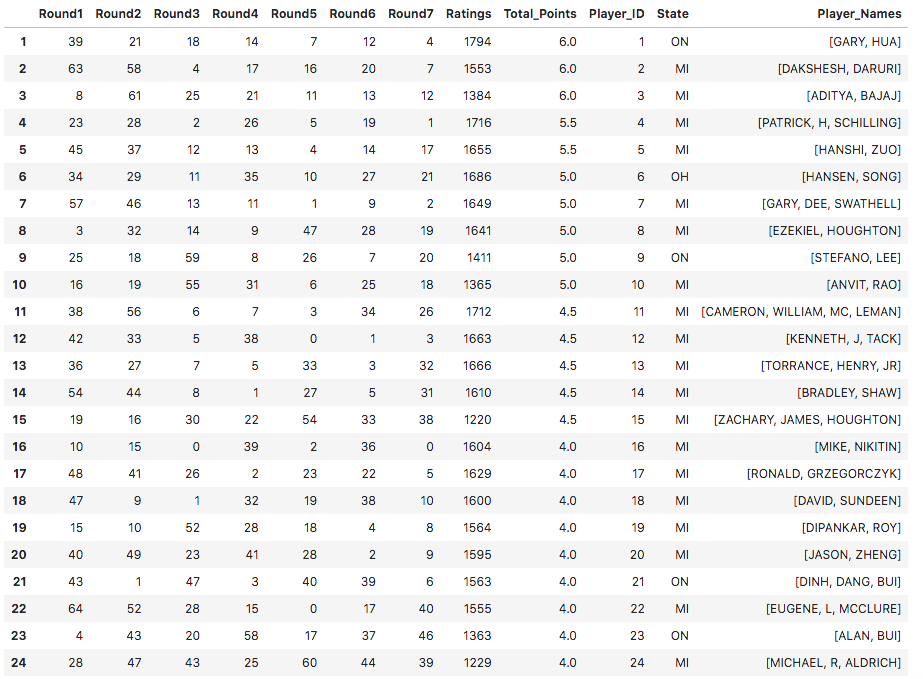

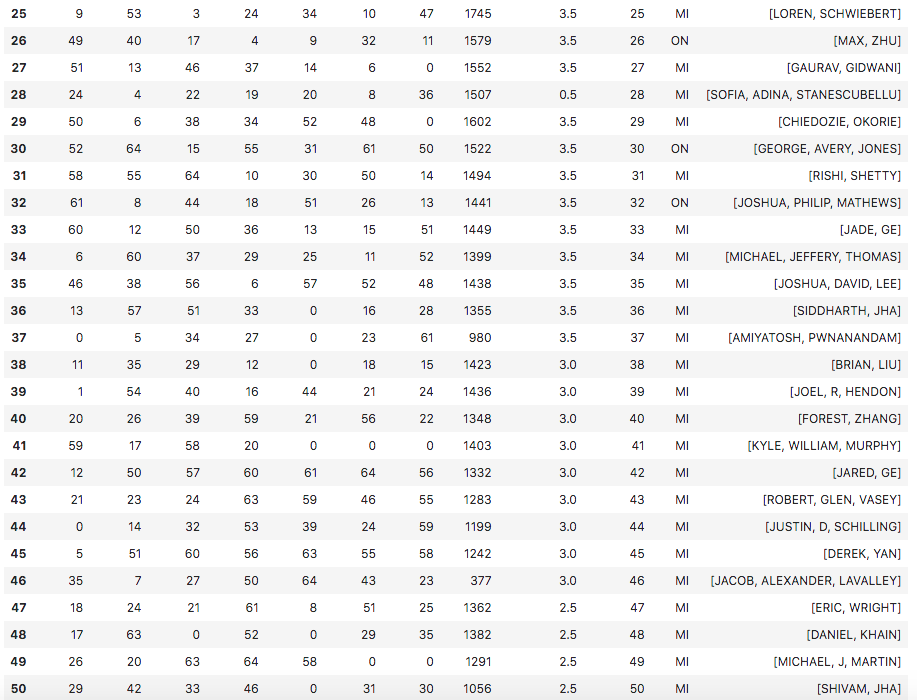

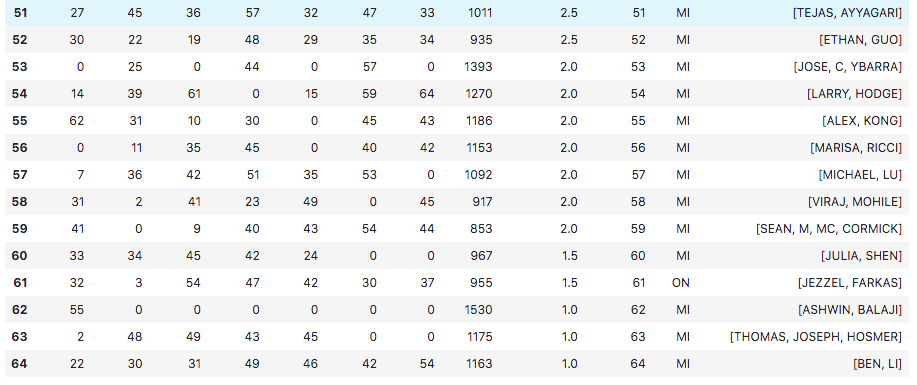

In [ ]:
I have indexed to the Player Names to compare the data better to the original table.

In [ ]:
games_df.set_index(['Player_Names'])

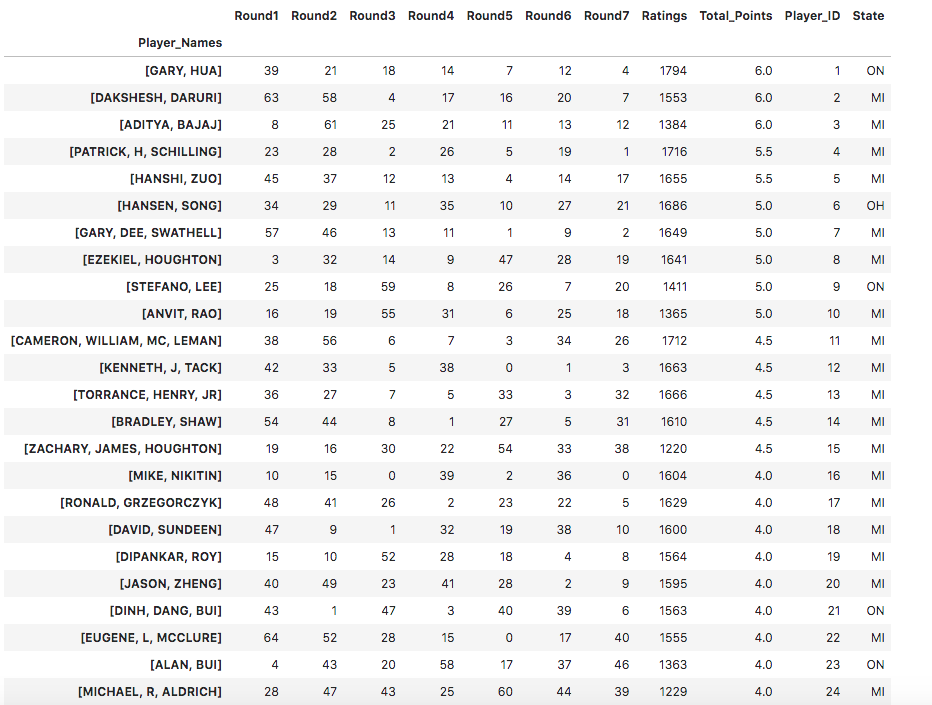

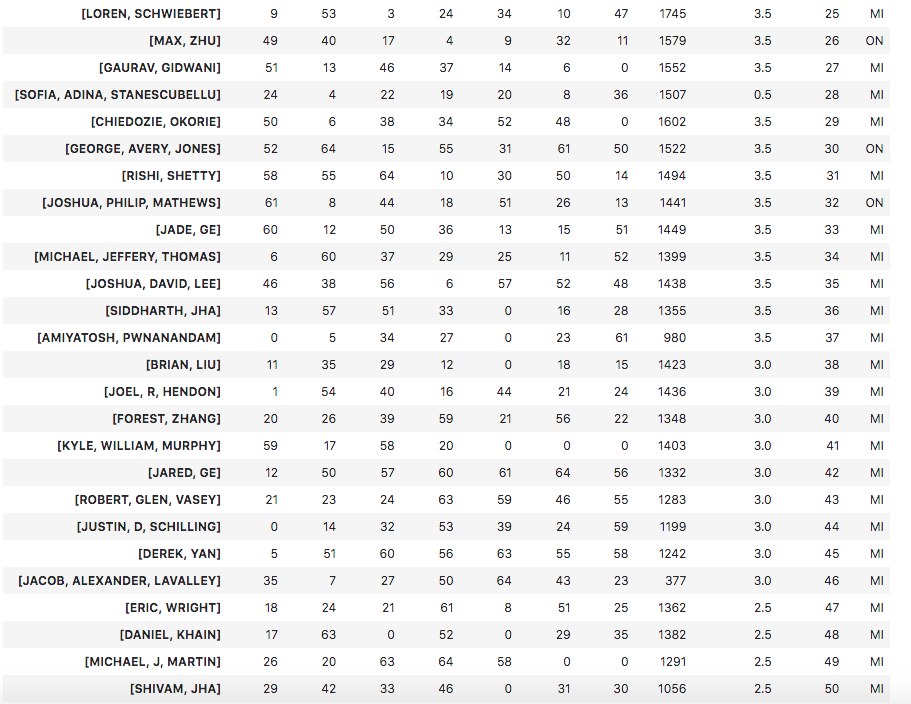

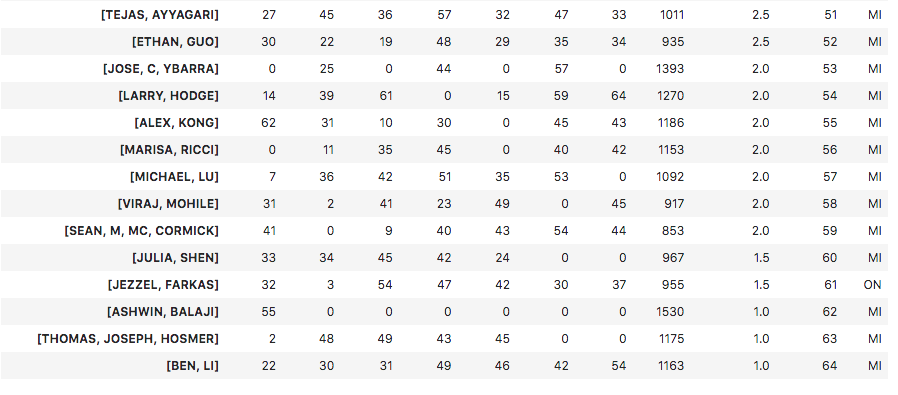

Below I've creating a series of the data i wish to analyze further and do computational processes on.

In [ ]:
games_df.set_index(['Round1', 'Round2', 'Round3', 'Round4', 'Round5', 'Round6', 'Round7'])['Ratings']

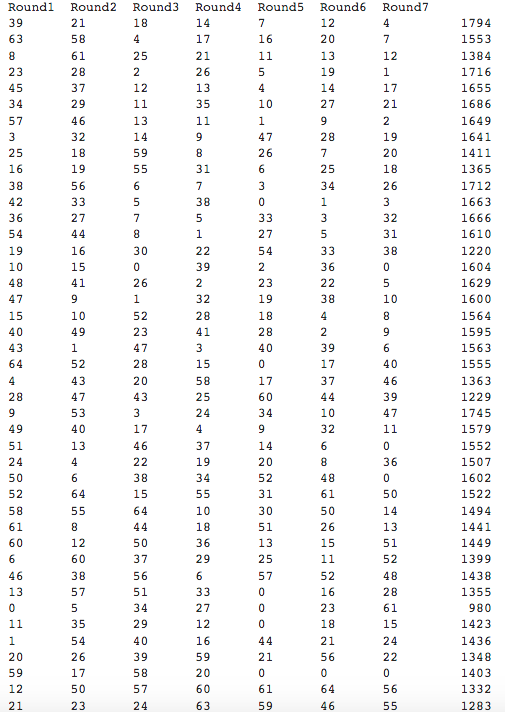

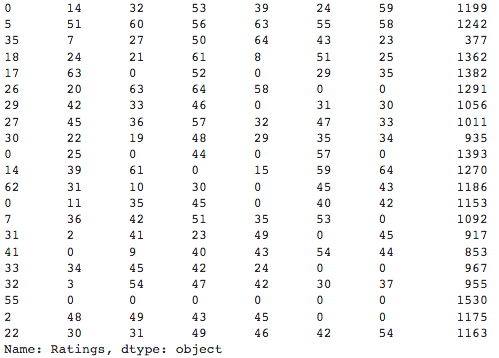

Here I wanted to create a function that would loop through the data and return the desired result.
This function is indexing the cells in the columns to their respective indexed players rating and replacing them, after this replacement is made all the data is then computed and divided by the number of games played which returns a column with the players Average Pre Tournament Chess Rating of Opponents.

In [ ]:
def parse_series(series):
    player_mapping = {}
    average_rating = []
    for index, row in series.iterrows():
        player_mapping[int(row['Player_ID'])] = int(row['Ratings'])
    for index, row in series.iterrows():
        
        if row[0] is not None:
            try:
                key1 = int(row.Round1)
                row.Round1 = player_mapping[key1]

                key2 = int(row.Round2)
                row.Round2 = player_mapping[key2]

                key3 = int(row.Round3)
                row.Round3 = player_mapping[key3]

                key4 = int(row.Round4)
                row.Round4 = player_mapping[key4]

                key5 = int(row.Round5)
                row.Round5 = player_mapping[key5]

                key6 = int(row.Round6)
                row.Round6 = player_mapping[key6]

                key7 = int(row.Round7)
                row.Round7 = player_mapping[key7]

                total = row.Round1 + row.Round2 + row.Round3 + row.Round4 + row.Round5 + row.Round6 + row.Round7
                games = len([row.Round1, row.Round2, row.Round3, row.Round4, row.Round5, row.Round6, row.Round7])
                average_rating.append(total/games)
            except KeyError:
                total = int(row.Round1) + int(row.Round2) + int(row.Round3) + int(row.Round4) + int(row.Round5) + int(row.Round6) + int(row.Round7)
                games = len([row.Round1, row.Round2, row.Round3, row.Round4, row.Round5, row.Round6, row.Round7])
                average_rating.append(total/games)
    return average_rating

Creating an object that will process the parse_series function and return its list values.

In [ ]:
average_rate = parse_series(games_df)

Adding the column -Average_Rating- to the games_df DataFrame object.

In [ ]:
games_df['Average_Rating'] = [n for n in average_rate]

As we can see, the Average Ratings have been computed and now applied to the original DataFrame Object, here is the top 5 rows.

In [ ]:
games_df.head()

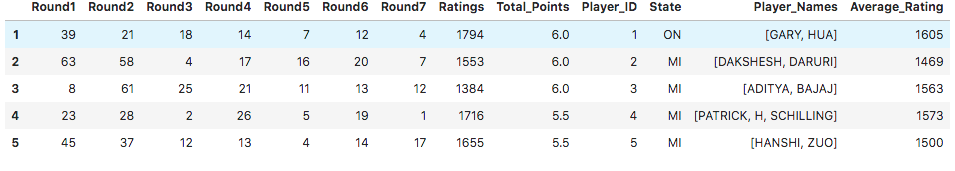

Here are te last 5 rows in the DataFrame object.

In [ ]:
games_df.tail()

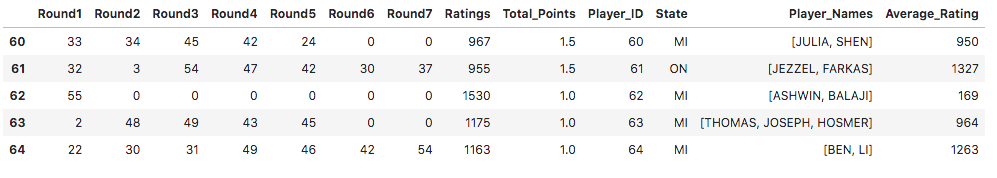

Now since all computations are done, and the data that we want is in the DataFrame, we can create and send to CSV File using the to_csv method.

In [ ]:
games_df.to_csv('Alternative_Project_results', sep=',', encoding='utf-8')